In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
merged_json = pd.read_json("/fastcampus-data/select_column.json")
products_json = pd.read_json("/fastcampus-data/products/products.json")

In [3]:
log_json = pd.read_json("/fastcampus-data/log-data/log_sampling.json")

In [4]:
df = pd.DataFrame(merged_json)

In [5]:
df2 = df.copy()

In [2]:
temp = pd.read_json("/fastcampus-data/orders/orders.json")
temp.isna().sum()

_id                           0
date_created                  0
date_placed               63030
date_updated              16535
date_closed              185194
date_paid                 64853
date_cancelled           206670
number                        0
shipping_status               0
items                         0
discounts                     0
tax_rate                      0
shipping_tax                  0
shipping_discount             0
shipping_price                0
item_tax_included             0
shipping_tax_included         0
closed                        0
cancelled                     0
delivered                     0
paid                          0
hold                          0
draft                         0
referrer_url                  0
landing_url                   0
channel                       0
note                          0
comments                      0
coupon                        0
tracking_number               0
customer_id                  92
status_i

In [6]:
df2

,_id,date_paid,customer_id,paid,name_x,category_id_y,product_ids,regular_price,age_group,한의사 여부,사업자 여부,cancelled,name,slug
1,5d60daf14e77525ec5ca1497,None,5d60ceba4e77525ec5ca1419,False,제일 경옥고,5cf8bbba0098b2225c5dfaa2,5d5cd0f74e77525ec5ca12ab,66000,20-29,1.0,0.0,True,의약품,medicine
2,5d60d2d04e77525ec5ca145b,2019-09-06T09:13:26.749Z,5d60d0a94e77525ec5ca1446,True,제일 경옥고,5cf8bbba0098b2225c5dfaa2,5d5cd0f74e77525ec5ca12ab,66000,30-39,0.0,1.0,False,의약품,medicine
3,5d60e27c4e77525ec5ca14b6,2019-10-21T02:18:23.528Z,5d60e2694e77525ec5ca14b5,True,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",5cf8bbba0098b2225c5dfaa3,5da696740dabe405b156eb5c,44800,20-29,0.0,0.0,False,도서,book
7,5d61cab34e77525ec5ca1574,2019-10-07T00:15:36.289Z,5d61ca9e4e77525ec5ca1573,True,통증치료를 위한 알기 쉬운 근골격계 이학적 검사법,5cf8bbba0098b2225c5dfaa3,5d96811f0dabe405b156d83a,60000,40-49,1.0,1.0,False,도서,book
8,5d634c574e77525ec5ca1607,2019-08-28T08:47:23.961Z,5d6348344e77525ec5ca15f5,True,제일 경옥고,5cf8bbba0098b2225c5dfaa2,5d5cd0f74e77525ec5ca12ab,66000,50-59,1.0,1.0,False,의약품,medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207144,632042d86c2e37002369f117,2022-09-13T08:46:18.342Z,5d70ccd419efa30eb2914271,True,"다나침 한쌈용 1,000쌈 (10,000pcs)",5e91ce6fbfe42609447852d1,5fe3ffe7fccb62001a21e836,143000,30-39,1.0,1.0,False,소모품,expendables
207145,6320441d6c2e37002369f126,None,5d959ad20dabe405b156d820,False,"[메디스트림 스탠다드] 당삼 500g, 중국",5fb32f7a5120316334323fd8,62a808c908e04900234de686,17400,40-49,1.0,1.0,False,한약재,medicinal-herbs
207146,632044cb6c2e37002369f129,2022-09-13T08:53:42.268Z,5d918f180dabe405b156d5e5,True,"[씨케이주식회사] 작약[한국] (5묶음) 600g*5ea, 한국",5fb32f7a5120316334323fd8,620c7728d41623002392d628,56000,30-39,0.0,1.0,False,한약재,medicinal-herbs
207147,632045696c2e37002369f136,2022-09-13T08:59:21.151Z,628ecb419d9388002406f007,True,맘 편하게 한약 처방하기,5ea40b671a3ca36b967849ad,630d5ce568554000236d9a5d,330000,None,1.0,0.0,False,온라인 강의,lecture


In [7]:
########### 원본
# drop columns 전처리
def drop_columns(delete_columns:list,df:pd.DataFrame) -> pd.DataFrame:
    # 회의 때 얘기한 컬럼 전처리
    # None or 필요 없는 컬럼
    df = df.drop(columns=delete_columns)
    return df

def dict_to_column(columns:list,df:pd.DataFrame) -> pd.DataFrame:
    for col in columns:
        key_set = dict_to_set(col,df)
        df = set_to_column(col,key_set,df)
    return df

def dict_to_set(column:str,df:pd.DataFrame) -> set:
    key_set = set()
    for i in tqdm(df[column]):
        
        # column 내용이 dict일 경우
        if isinstance(i, dict):
            key_set |= set(i.keys())
        
        # column 내용이 None type 일 경우
        elif i == None:
            continue
        
        # column 내용이 [dict]로 감싸져있는 경우
        elif isinstance(i, list)&len(i)>0:
            if isinstance(i[0], str):
                continue
            key_set |= set(i[0].keys())
        
    return key_set

def set_to_column(column:str,key_set:set,df:pd.DataFrame) -> pd.DataFrame:
    for key in key_set:
        
        #중복인 경우 컬럼_중복컬럼으로 추가
        if key in df.columns:
            df[column+'_'+key] = df[column].apply(lambda x: x.get(key, None) if isinstance(x, dict) else None if x==None
                                       else ( None \
                                       if len(x)==0 else ( x[0].get(key, None) \
                                       if isinstance(x[0],dict)  else \
                                           None)) \
                                      )
        #중복이 아닌 경우
        else:
            df[key] = df[column].apply(lambda x: x.get(key, None) if isinstance(x, dict) else None if x==None
                                       else ( None \
                                       if len(x)==0 else ( x[0].get(key, None) \
                                       if isinstance(x[0],dict)  else \
                                           None)) \
                                       
                                      )

    df = df.drop(columns=[column])
    return df

# 컬럼안 key 값이 한 개일 경우 딕셔너리만 풉니다!
def key_to_element(element_columns:list,df:pd.DataFrame)->pd.DataFrame:
    for col in element_columns:
        key_set = dict_to_set(col, df)
        assert len(key_set)==1, f'{col}: key가 2개 이상이므로 dict_to_column 함수 이용하세요'
        for key in key_set:
            df[col] = df[col].apply(lambda x: x.get(key,None) if isinstance(x,dict) else None)
    return df

In [8]:
# drop columns 전처리
def drop_columns(delete_columns:list,df:pd.DataFrame) -> pd.DataFrame:
    # 회의 때 얘기한 컬럼 전처리
    # None or 필요 없는 컬럼
    df = df.drop(columns=delete_columns)
    return df

def dict_to_column(columns:list,df:pd.DataFrame) -> pd.DataFrame:
    for col in columns:
        key_set = dict_to_set(col,df)
        df = set_to_column(col,key_set,df)
    return df

def dict_to_set(column:str,df:pd.DataFrame) -> set:
    key_set = set()
    for i in tqdm(df[column]):
        
        # column 내용이 dict일 경우
        if isinstance(i, dict):
            key_set |= set(i.keys())
        
        # column 내용이 None type 일 경우
        elif i == None:
            continue
        
        # column 내용이 [dict]로 감싸져있는 경우
        elif isinstance(i, list) & len(i) == 1:
            if isinstance(i[0], str):
                continue
            key_set |= set(i[0].keys())
        
        # list의 길이가 1보다 긴 경우
        elif isinstance(i, list) & len(i) > 1:
            if isinstance(i[0], str):
                continue
            for j in i:
                key_set |= set(j.keys())
        

    return key_set

def set_to_column(column:str,key_set:set,df:pd.DataFrame) -> pd.DataFrame:
    for key in key_set:
        
        #중복인 경우 컬럼_중복컬럼으로 추가
        if key in df.columns:
            df[column+'_'+key] = df[column].apply(lambda x: x.get(key, None) if isinstance(x, dict) else None if x==None
                                       else ( None \
                                       if len(x)==0 else ( x[0].get(key, None) \
                                       if isinstance(x[0],dict)  else \
                                           None)) \
                                      )
        
        #중복이 아닌 경우
        else:
            df[key] = df[column].apply(lambda x: x.get(key, None) if isinstance(x, dict) else None if x==None
                                       else ( None \
                                       if len(x)==0 else ( x[0].get(key, None) \
                                       if isinstance(x[0],dict)  else \
                                           None)) \
                                       
                                      )

    df = df.drop(columns=[column])
    return df

# 컬럼안 key 값이 한 개일 경우 딕셔너리만 풉니다!
def key_to_element(element_columns:list,df:pd.DataFrame)->pd.DataFrame:
    for col in element_columns:
        key_set = dict_to_set(col, df)
        assert len(key_set)==1, f'{col}: key가 2개 이상이므로 dict_to_column 함수 이용하세요'
        for key in key_set:
            df[col] = df[col].apply(lambda x: x.get(key,None) if isinstance(x,dict) else None)
    return df

In [9]:
df2

,_id,date_paid,customer_id,paid,name_x,category_id_y,product_ids,regular_price,age_group,한의사 여부,사업자 여부,cancelled,name,slug
1,5d60daf14e77525ec5ca1497,None,5d60ceba4e77525ec5ca1419,False,제일 경옥고,5cf8bbba0098b2225c5dfaa2,5d5cd0f74e77525ec5ca12ab,66000,20-29,1.0,0.0,True,의약품,medicine
2,5d60d2d04e77525ec5ca145b,2019-09-06T09:13:26.749Z,5d60d0a94e77525ec5ca1446,True,제일 경옥고,5cf8bbba0098b2225c5dfaa2,5d5cd0f74e77525ec5ca12ab,66000,30-39,0.0,1.0,False,의약품,medicine
3,5d60e27c4e77525ec5ca14b6,2019-10-21T02:18:23.528Z,5d60e2694e77525ec5ca14b5,True,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",5cf8bbba0098b2225c5dfaa3,5da696740dabe405b156eb5c,44800,20-29,0.0,0.0,False,도서,book
7,5d61cab34e77525ec5ca1574,2019-10-07T00:15:36.289Z,5d61ca9e4e77525ec5ca1573,True,통증치료를 위한 알기 쉬운 근골격계 이학적 검사법,5cf8bbba0098b2225c5dfaa3,5d96811f0dabe405b156d83a,60000,40-49,1.0,1.0,False,도서,book
8,5d634c574e77525ec5ca1607,2019-08-28T08:47:23.961Z,5d6348344e77525ec5ca15f5,True,제일 경옥고,5cf8bbba0098b2225c5dfaa2,5d5cd0f74e77525ec5ca12ab,66000,50-59,1.0,1.0,False,의약품,medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207144,632042d86c2e37002369f117,2022-09-13T08:46:18.342Z,5d70ccd419efa30eb2914271,True,"다나침 한쌈용 1,000쌈 (10,000pcs)",5e91ce6fbfe42609447852d1,5fe3ffe7fccb62001a21e836,143000,30-39,1.0,1.0,False,소모품,expendables
207145,6320441d6c2e37002369f126,None,5d959ad20dabe405b156d820,False,"[메디스트림 스탠다드] 당삼 500g, 중국",5fb32f7a5120316334323fd8,62a808c908e04900234de686,17400,40-49,1.0,1.0,False,한약재,medicinal-herbs
207146,632044cb6c2e37002369f129,2022-09-13T08:53:42.268Z,5d918f180dabe405b156d5e5,True,"[씨케이주식회사] 작약[한국] (5묶음) 600g*5ea, 한국",5fb32f7a5120316334323fd8,620c7728d41623002392d628,56000,30-39,0.0,1.0,False,한약재,medicinal-herbs
207147,632045696c2e37002369f136,2022-09-13T08:59:21.151Z,628ecb419d9388002406f007,True,맘 편하게 한약 처방하기,5ea40b671a3ca36b967849ad,630d5ce568554000236d9a5d,330000,None,1.0,0.0,False,온라인 강의,lecture


# 전처리

## 날짜 데이터 없는것 쳐내기

In [10]:
df2['date_paid'] = pd.to_datetime(df['date_paid'])
df2 = df2[~df2['date_paid'].isna()]

## 날짜 2022년 5월달부터 9월달까지 

In [12]:
df2 = df2[df2['date_paid'] > "2022-05-12"]

## paid == Ture and cancelled ==False

In [13]:
df2 = df2[(df2['paid'] == True) & (df2['cancelled']==False)]


In [14]:
df2.reset_index(drop=True,inplace=True)

In [15]:
df2

,_id,date_paid,customer_id,paid,name_x,category_id_y,product_ids,regular_price,age_group,한의사 여부,사업자 여부,cancelled,name,slug
0,62354552f967570023fb002e,2022-05-13 04:40:00+00:00,5dad06d10dabe405b156ee57,True,"동방 수침 9,000쌈+1,000쌈 증정 (100,000pcs)",5e91ce6fbfe42609447852d1,60893ae9c1908b001a63fc79,1700000,30-39,1.0,1.0,False,소모품,expendables
1,6243ac5e6f766b002466abda,2022-06-13 06:22:00+00:00,5db11be70dabe405b156f2b9,True,HCK 엘리베이션베드 (E100),5e5d8fe7bfe4260944782c19,610cd88909c63a06ed1489fe,850000,20-29,1.0,1.0,False,치료실 물품,clincal-equipment
2,626bf75996089d00224134c4,2022-05-18 01:43:00+00:00,625aa5cbcb28e6002469eb79,True,임상해부학 특강,5ea40b671a3ca36b967849ad,60236e092c593a001ace9ffa,88000,None,0.0,0.0,False,온라인 강의,lecture
3,6278da149d93880024062480,2022-05-12 09:23:00+00:00,5e5a51f4bfe4260944782b2a,True,유한킴벌리 덴탈마스크 50매,5e5d8fe7bfe4260944782c19,62625488c1ca560032c7a803,9000,20-29,1.0,1.0,False,치료실 물품,clincal-equipment
4,627a29789d93880024062a27,2022-05-17 02:02:00+00:00,627a24dd9d938800240629fd,True,[보수교육] 2022년 대한한방내과학회 춘계 학술대회,5ea40b671a3ca36b967849ad,623d77426f766b0024669852,40000,None,1.0,0.0,False,온라인 강의,lecture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48869,632040cf6c2e37002369f109,2022-09-13 08:35:46.208000+00:00,5e7c92adbfe4260944784430,True,메디TV Ep.02,62bc13f608e04900234e38d0,62c2951888c7dc00239bc04a,5999,30-39,1.0,1.0,False,메디TV,medi-tv
48870,632040eb6c2e37002369f10b,2022-09-13 08:39:57.460000+00:00,5d9ef3790dabe405b156e346,True,아크메시 노치넥 프론트 포켓 스크럽 남성 탑 (Dry up) WARM GRAY,5e8e8b25bfe4260944785088,5eb9112309982e0735b2d59b,55000,20-29,1.0,0.0,False,의류/잡화,clothes
48871,632042d86c2e37002369f117,2022-09-13 08:46:18.342000+00:00,5d70ccd419efa30eb2914271,True,"다나침 한쌈용 1,000쌈 (10,000pcs)",5e91ce6fbfe42609447852d1,5fe3ffe7fccb62001a21e836,143000,30-39,1.0,1.0,False,소모품,expendables
48872,632044cb6c2e37002369f129,2022-09-13 08:53:42.268000+00:00,5d918f180dabe405b156d5e5,True,"[씨케이주식회사] 작약[한국] (5묶음) 600g*5ea, 한국",5fb32f7a5120316334323fd8,620c7728d41623002392d628,56000,30-39,0.0,1.0,False,한약재,medicinal-herbs


## 한의사, 사업자 여부

In [16]:
# 응답이 없으니 일단 학생으로 넣는다.
df2['한의사 여부'] = df2['한의사 여부'].fillna(0)
df2['사업자 여부'] = df2['사업자 여부'].fillna(0)

## age_group

우선 null값을 etc로 넣는다. 나중에 사업자 여부 학생여부로 연령대를 나눌수도 있겠지만 일단은 미응답자로 넣는다.

In [17]:
df2['age_group'].value_counts()

20-29    22138
30-39    10870
40-49     2941
50-59      752
60-        106
0-9          2
Name: age_group, dtype: int64

In [18]:
df2['age_group'] = df2['age_group'].fillna('etc')

In [19]:
df2.isnull().sum()

_id              0
date_paid        0
customer_id      0
paid             0
name_x           0
category_id_y    0
product_ids      0
regular_price    0
age_group        0
한의사 여부           0
사업자 여부           0
cancelled        0
name             0
slug             0
dtype: int64

# EDA

In [20]:
df2

,_id,date_paid,customer_id,paid,name_x,category_id_y,product_ids,regular_price,age_group,한의사 여부,사업자 여부,cancelled,name,slug
0,62354552f967570023fb002e,2022-05-13 04:40:00+00:00,5dad06d10dabe405b156ee57,True,"동방 수침 9,000쌈+1,000쌈 증정 (100,000pcs)",5e91ce6fbfe42609447852d1,60893ae9c1908b001a63fc79,1700000,30-39,1.0,1.0,False,소모품,expendables
1,6243ac5e6f766b002466abda,2022-06-13 06:22:00+00:00,5db11be70dabe405b156f2b9,True,HCK 엘리베이션베드 (E100),5e5d8fe7bfe4260944782c19,610cd88909c63a06ed1489fe,850000,20-29,1.0,1.0,False,치료실 물품,clincal-equipment
2,626bf75996089d00224134c4,2022-05-18 01:43:00+00:00,625aa5cbcb28e6002469eb79,True,임상해부학 특강,5ea40b671a3ca36b967849ad,60236e092c593a001ace9ffa,88000,etc,0.0,0.0,False,온라인 강의,lecture
3,6278da149d93880024062480,2022-05-12 09:23:00+00:00,5e5a51f4bfe4260944782b2a,True,유한킴벌리 덴탈마스크 50매,5e5d8fe7bfe4260944782c19,62625488c1ca560032c7a803,9000,20-29,1.0,1.0,False,치료실 물품,clincal-equipment
4,627a29789d93880024062a27,2022-05-17 02:02:00+00:00,627a24dd9d938800240629fd,True,[보수교육] 2022년 대한한방내과학회 춘계 학술대회,5ea40b671a3ca36b967849ad,623d77426f766b0024669852,40000,etc,1.0,0.0,False,온라인 강의,lecture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48869,632040cf6c2e37002369f109,2022-09-13 08:35:46.208000+00:00,5e7c92adbfe4260944784430,True,메디TV Ep.02,62bc13f608e04900234e38d0,62c2951888c7dc00239bc04a,5999,30-39,1.0,1.0,False,메디TV,medi-tv
48870,632040eb6c2e37002369f10b,2022-09-13 08:39:57.460000+00:00,5d9ef3790dabe405b156e346,True,아크메시 노치넥 프론트 포켓 스크럽 남성 탑 (Dry up) WARM GRAY,5e8e8b25bfe4260944785088,5eb9112309982e0735b2d59b,55000,20-29,1.0,0.0,False,의류/잡화,clothes
48871,632042d86c2e37002369f117,2022-09-13 08:46:18.342000+00:00,5d70ccd419efa30eb2914271,True,"다나침 한쌈용 1,000쌈 (10,000pcs)",5e91ce6fbfe42609447852d1,5fe3ffe7fccb62001a21e836,143000,30-39,1.0,1.0,False,소모품,expendables
48872,632044cb6c2e37002369f129,2022-09-13 08:53:42.268000+00:00,5d918f180dabe405b156d5e5,True,"[씨케이주식회사] 작약[한국] (5묶음) 600g*5ea, 한국",5fb32f7a5120316334323fd8,620c7728d41623002392d628,56000,30-39,0.0,1.0,False,한약재,medicinal-herbs


## name, slug 거래 횟수

In [21]:
top10_category = df2['slug'].value_counts()[:10]

In [22]:
top10_category

lecture              31518
book                  4529
expendables           3564
medi-tv               2564
medicinal-herbs       1380
food                  1057
medical-equipment     1040
medicine               942
clothes                490
clincal-equipment      450
Name: slug, dtype: int64

## Most popular

In [23]:
product_df = pd.DataFrame(products_json)

In [24]:
product_df = key_to_element(['_id'],product_df)

100%|██████████| 5141/5141 [00:00<00:00, 708327.86it/s]


In [25]:
most_popular_item = df2['product_ids'].value_counts()[:20]

In [26]:
most_popular_item

5ff2d56f5ae455001b219ae2    1110
62821cd49d9388002406450e     828
62821dca9d9388002406455a     828
62821d459d9388002406452b     828
62821d249d93880024064523     828
62821e919d938800240645a7     828
62821ecf9d938800240645b9     828
62821eb09d938800240645b1     828
62821d649d93880024064536     828
6283681f9d93880024064c04     828
6283689f9d93880024064c19     828
628369169d93880024064c25     828
62821da29d9388002406454f     828
62821d849d93880024064542     828
62821e2b9d93880024064584     828
62821d029d93880024064516     828
62821e079d93880024064575     828
62821e709d93880024064599     828
62821e519d93880024064590     828
62821de79d9388002406456b     828
Name: product_ids, dtype: int64

In [27]:
product_df[product_df['_id'].isin(most_popular_item.index)]['name']

1668           부항컵 동방 일회용 1,000개
4240       [제32기 전졸협] 국시특강 심계내과학
4241       [제32기 전졸협] 국시특강 비계내과학
4242       [제32기 전졸협] 국시특강 폐계내과학
4243       [제32기 전졸협] 국시특강 신계내과학
4244         [제32기 전졸협] 국시특강 상한론
4245        [제32기 전졸협] 국시특강 사상의학
4246         [제32기 전졸협] 국시특강 침구학
4247    [제32기 전졸협] 국시특강 보건의약관계법규
4248         [제32기 전졸협] 국시특강 외과학
4249      [제32기 전졸협] 국시특강 신경정신과학
4250     [제32기 전졸협] 국시특강 안이비인후과학
4251        [제32기 전졸협] 국시특강 부인과학
4252        [제32기 전졸협] 국시특강 소아과학
4253        [제32기 전졸협] 국시특강 예방의학
4254       [제32기 전졸협] 국시특강 한방생리학
4255         [제32기 전졸협] 국시특강 본초학
4274       [제32기 전졸협] 국시특강 내과학특강
4275     [제32기 전졸협] 국시특강 한방생리학특강
4276     [제32기 전졸협] 국시특강 비계내과학특강
Name: name, dtype: object

## 전졸협 관련 삭제

In [28]:
df3 = df2.copy()

In [29]:
jol = product_df[product_df['name'].str.contains('전졸협')]

In [30]:
len(jol)

50

In [31]:
df3[df3['product_ids'].isin(jol['_id'])]

,_id,date_paid,customer_id,paid,name_x,category_id_y,product_ids,regular_price,age_group,한의사 여부,사업자 여부,cancelled,name,slug
1098,62871f089d9388002406570c,2022-05-20 04:54:33.054000+00:00,5f33869ca0b91001bf48c428,True,[제32기 전졸협] 국시특강 간계내과학,5ea40b671a3ca36b967849ad,62821ca79d93880024064505,0,30-39,0.0,1.0,False,온라인 강의,lecture
1099,62871f0a9d9388002406570e,2022-05-20 04:54:34.623000+00:00,5e9aba6fbfe4260944785d9a,True,[제32기 전졸협] 국시특강 간계내과학,5ea40b671a3ca36b967849ad,62821ca79d93880024064505,0,30-39,1.0,0.0,False,온라인 강의,lecture
1100,62871f0c9d93880024065710,2022-05-20 04:54:36.071000+00:00,5d60c5884e77525ec5ca13ae,True,[제32기 전졸협] 국시특강 간계내과학,5ea40b671a3ca36b967849ad,62821ca79d93880024064505,0,30-39,0.0,1.0,False,온라인 강의,lecture
1101,62871f1c9d93880024065712,2022-05-20 04:54:53.001000+00:00,5f33869ca0b91001bf48c428,True,[제32기 전졸협] 국시특강 심계내과학,5ea40b671a3ca36b967849ad,62821cd49d9388002406450e,0,30-39,0.0,1.0,False,온라인 강의,lecture
1102,62871f1d9d93880024065714,2022-05-20 04:54:53.545000+00:00,5e9aba6fbfe4260944785d9a,True,[제32기 전졸협] 국시특강 심계내과학,5ea40b671a3ca36b967849ad,62821cd49d9388002406450e,0,30-39,1.0,0.0,False,온라인 강의,lecture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44993,6308620c68554000236d8a35,2022-08-26 06:02:52.519000+00:00,62c64d235f3776322a20b406,True,[제32기 전졸협] 국시특강 신경정신과학특강,5ea40b671a3ca36b967849ad,62d7b35753948a002289a2ea,0,etc,0.0,0.0,False,온라인 강의,lecture
44994,6308621568554000236d8a38,2022-08-26 06:03:01.781000+00:00,62c64d235f3776322a20b406,True,[제32기 전졸협] 국시특강 안이비인후과학특강,5ea40b671a3ca36b967849ad,62d7b36b53948a002289a2ef,0,etc,0.0,0.0,False,온라인 강의,lecture
44995,6308621e68554000236d8a3a,2022-08-26 06:03:10.373000+00:00,62c64d235f3776322a20b406,True,[제32기 전졸협] 국시특강 부인과학특강,5ea40b671a3ca36b967849ad,62d7b37f53948a002289a2f4,0,etc,0.0,0.0,False,온라인 강의,lecture
44996,6308622668554000236d8a3c,2022-08-26 06:03:18.451000+00:00,62c64d235f3776322a20b406,True,[제32기 전졸협] 국시특강 예방의학특강,5ea40b671a3ca36b967849ad,62f5fb260b5b9e002b2de566,0,etc,0.0,0.0,False,온라인 강의,lecture


In [32]:
df4 = df3[~df3['product_ids'].isin(jol['_id'])]

## 전졸협 제외 mostpopular count 기준

In [33]:
most_popular_20 = df4['product_ids'].value_counts()[:20]

In [34]:
most_popular_20_df = product_df[product_df['_id'].isin(most_popular_20.index)][['_id','name']]

In [35]:
popular = pd.DataFrame(most_popular_20).reset_index(drop=False)

In [36]:
most_popular_20_df.rename(columns={'_id':'index'},inplace=True)
pd.merge(popular,most_popular_20_df,how='left',on='index')

,index,product_ids,name
0,5ff2d56f5ae455001b219ae2,1110,"부항컵 동방 일회용 1,000개"
1,62c69af1b99f01002300ab86,536,<도전! 베스트 강의> 올인원 패키지
2,629860599d93880024071acc,531,비만문답
3,62bbee3a08e04900234e36c8,439,플로차트 정형외과 진단
4,625fb6008d9a7c0022eb46a6,412,[보수교육] 척추신경추나의학회 2022년 5월 온라인 중앙세미나
5,62ff2f43ca740b0024397ca4,347,초음파 유도하 침 시술 가이드북
6,61e12e547c9ea1003fa98943,337,임상해부학 특강: 골학 02. 상지
7,5f28874bf05d685c4f22f508,332,방성혜 부인과 전문의서 처방 강의
8,630d5ce568554000236d9a5d,300,맘 편하게 한약 처방하기
9,602f6ee32c593a001aceaed0,299,[멤버스] Medistream MEMBERS _구독가입형


## 전졸협 제외 매출

In [37]:
df4

,_id,date_paid,customer_id,paid,name_x,category_id_y,product_ids,regular_price,age_group,한의사 여부,사업자 여부,cancelled,name,slug
0,62354552f967570023fb002e,2022-05-13 04:40:00+00:00,5dad06d10dabe405b156ee57,True,"동방 수침 9,000쌈+1,000쌈 증정 (100,000pcs)",5e91ce6fbfe42609447852d1,60893ae9c1908b001a63fc79,1700000,30-39,1.0,1.0,False,소모품,expendables
1,6243ac5e6f766b002466abda,2022-06-13 06:22:00+00:00,5db11be70dabe405b156f2b9,True,HCK 엘리베이션베드 (E100),5e5d8fe7bfe4260944782c19,610cd88909c63a06ed1489fe,850000,20-29,1.0,1.0,False,치료실 물품,clincal-equipment
2,626bf75996089d00224134c4,2022-05-18 01:43:00+00:00,625aa5cbcb28e6002469eb79,True,임상해부학 특강,5ea40b671a3ca36b967849ad,60236e092c593a001ace9ffa,88000,etc,0.0,0.0,False,온라인 강의,lecture
3,6278da149d93880024062480,2022-05-12 09:23:00+00:00,5e5a51f4bfe4260944782b2a,True,유한킴벌리 덴탈마스크 50매,5e5d8fe7bfe4260944782c19,62625488c1ca560032c7a803,9000,20-29,1.0,1.0,False,치료실 물품,clincal-equipment
4,627a29789d93880024062a27,2022-05-17 02:02:00+00:00,627a24dd9d938800240629fd,True,[보수교육] 2022년 대한한방내과학회 춘계 학술대회,5ea40b671a3ca36b967849ad,623d77426f766b0024669852,40000,etc,1.0,0.0,False,온라인 강의,lecture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48869,632040cf6c2e37002369f109,2022-09-13 08:35:46.208000+00:00,5e7c92adbfe4260944784430,True,메디TV Ep.02,62bc13f608e04900234e38d0,62c2951888c7dc00239bc04a,5999,30-39,1.0,1.0,False,메디TV,medi-tv
48870,632040eb6c2e37002369f10b,2022-09-13 08:39:57.460000+00:00,5d9ef3790dabe405b156e346,True,아크메시 노치넥 프론트 포켓 스크럽 남성 탑 (Dry up) WARM GRAY,5e8e8b25bfe4260944785088,5eb9112309982e0735b2d59b,55000,20-29,1.0,0.0,False,의류/잡화,clothes
48871,632042d86c2e37002369f117,2022-09-13 08:46:18.342000+00:00,5d70ccd419efa30eb2914271,True,"다나침 한쌈용 1,000쌈 (10,000pcs)",5e91ce6fbfe42609447852d1,5fe3ffe7fccb62001a21e836,143000,30-39,1.0,1.0,False,소모품,expendables
48872,632044cb6c2e37002369f129,2022-09-13 08:53:42.268000+00:00,5d918f180dabe405b156d5e5,True,"[씨케이주식회사] 작약[한국] (5묶음) 600g*5ea, 한국",5fb32f7a5120316334323fd8,620c7728d41623002392d628,56000,30-39,0.0,1.0,False,한약재,medicinal-herbs


In [38]:
most_sales = df4['regular_price'].groupby(by=df4['product_ids']).sum().sort_values()[-20:]

In [39]:
most_sales_df = pd.DataFrame(most_sales).reset_index(drop=False)
most_sales_df.rename(columns={'product_ids':'_id'},inplace=True)

In [40]:
most_sales_df

,_id,regular_price
0,5de751c24267e105dffeebab,24000000
1,5ecf6b60e510ee503167c24d,25440000
2,62bbee3a08e04900234e36c8,26340000
3,610a369a09c63a06ed1487a7,26400000
4,625fb6008d9a7c0022eb46a6,28840000
5,617a2e60bc63410023471a58,28956700
6,62ccfd2c3fc97a002bec838c,33915000
7,62ccfa973fc97a002bec8372,38880000
8,624194ad6f766b002466a444,39600000
9,6165559b4cf9a5002287f193,40500000


In [41]:
temp = product_df[product_df['_id'].isin(most_sales_df['_id'])][['_id','name']]

In [42]:
most_sales_20 = pd.merge(most_sales_df,temp,on='_id',how='left').sort_values(by='regular_price',ascending=False)

In [43]:
most_sales_20

,_id,regular_price,name
19,630ca26f68554000236d9833,2455200000,아큐비즈 포켓 Acuviz Pocket 초음파
18,5ff2d56f5ae455001b219ae2,129870000,"부항컵 동방 일회용 1,000개"
17,62ba63f008e04900234e2edf,100100000,[멤버스] 경영세션 EXCLUSIVE 02기 (전후반기 통합)
16,630d5ce568554000236d9a5d,99000000,맘 편하게 한약 처방하기
15,62dfc95a119967002389c50a,92400000,[멤버스] 경영세션 13기
14,5e27f4d64267e105dfff0cb2,66000000,"OMNIFIT 마인드케어 메디칼 (ubpulse, ubpulse H3, 맥파분석기)"
13,602f6ee32c593a001aceaed0,65780000,[멤버스] Medistream MEMBERS _구독가입형
12,62b1318208e04900234e09ca,56100000,"동방 수침 10,000쌈 (100,000pcs)"
11,62c939dcb99f01002300b4b3,53900000,[멤버스] 경영세션 EXCLUSIVE 03기 (전후반기 통합)
10,62c69af1b99f01002300ab86,53064000,<도전! 베스트 강의> 올인원 패키지


## 전졸협 제외 value_counts()

In [44]:
df4['name'].value_counts()

도서         4529
온라인 강의     4207
소모품        3564
메디TV       2564
한약재        1380
식품         1057
의료기기       1040
의약품         942
의류/잡화       490
치료실 물품      450
구독          309
오프라인 강의     290
생활          278
가전/가구       211
디자인         107
재활 용품        43
해부학 모형       42
약속처방         39
기타           17
기획서비스         4
Name: name, dtype: int64

<AxesSubplot:xlabel='name', ylabel='count'>

/home/user_1/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user_1/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user_1/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user_1/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user_1/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(byte

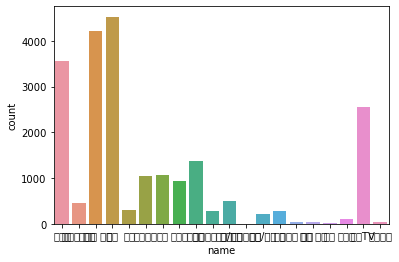

In [45]:
sns.countplot(data=df4,x='name')

## 학생, 페이닥터, 창업가, 병원장 각각의 most popular item 20 뽑아보기

In [79]:
student = df4[(df4['한의사 여부'] == 0) &(df4['사업자 여부'] == 0) ]
ceo = df4[(df4['한의사 여부'] == 0) &(df4['사업자 여부'] == 1) ]
paydoc = df4[(df4['한의사 여부'] == 1) &(df4['사업자 여부'] == 0) ]
docceo = df4[(df4['한의사 여부'] == 1) &(df4['사업자 여부'] == 1) ]

In [88]:
student_top20 = pd.DataFrame(student[['product_ids','name_x','name']].value_counts()[:20])
ceo_top20 = pd.DataFrame(ceo[['product_ids','name_x','name']].value_counts()[:20])
paydoc_top20 = pd.DataFrame(paydoc[['product_ids','name_x','name']].value_counts()[:20])
docceo_top20 = pd.DataFrame(docceo[['product_ids','name_x','name']].value_counts()[:20])

In [96]:
display(student_top20,ceo_top20,paydoc_top20,docceo_top20)

,,,0
product_ids,name_x,name,
60d018b7d26af90681b18980,윤상훈·권병조의 알짜 근육학,도서,94
625fb6008d9a7c0022eb46a6,[보수교육] 척추신경추나의학회 2022년 5월 온라인 중앙세미나,온라인 강의,62
629860599d93880024071acc,비만문답,도서,61
62c69af1b99f01002300ab86,<도전! 베스트 강의> 올인원 패키지,온라인 강의,53
62be7cbe08e04900234e5a7c,어쩌다 유학,온라인 강의,43
62ff2f43ca740b0024397ca4,초음파 유도하 침 시술 가이드북,도서,40
62bbee3a08e04900234e36c8,플로차트 정형외과 진단,도서,38
5f28874bf05d685c4f22f508,방성혜 부인과 전문의서 처방 강의,온라인 강의,35
6182113bbc63410023473754,흔히보는 정형외과 외래진료 가이드북,도서,31


0
product_ids              name_x                          name       
602f6ee32c593a001aceaed0 [멤버스] Medistream MEMBERS _구독가입형 구독      144
5ff2d56f5ae455001b219ae2 동방 일회용 부항컵 1,000개               소모품      83
                         부항컵 동방 일회용 1,000개               소모품      61
62c69af1b99f01002300ab86 <도전! 베스트 강의> 올인원 패키지            온라인 강의   32
62ff2f43ca740b0024397ca4 초음파 유도하 침 시술 가이드북               도서       24
5eb3aa9309982e0735b2d432 온뜸 의료용 양면테이프                    의료기기     24
630ca26f68554000236d9833 아큐비즈 포켓 Acuviz Pocket 초음파       의료기기     23
630d5ce568554000236d9a5d 맘 편하게 한약 처방하기                   온라인 강의   23
62c2a42c88c7dc00239bc13e 메디TV Ep.27                      메디TV     22
62bbee3a08e04900234e36c8 플로차트 정형외과 진단                    도서       22
629860599d93880024071acc 비만문답                            도서       21
62f61d230b5b9e002b2de62f Freshvalley 추석  실속형 샤인머스캣 선물세트  식품       18
62c292b688c7dc00239bc037 메디TV Ep.01                      메디TV     17
5f10f2a7221c8b5f77c8e7c2 동방 스프링침 한쌈용 1,000쌈 (10,000pcs)  소모품      15
5fca15d40204ef001a67eeaa 성심 일회용 주사침 (기본사이즈) 100pcs       소모품      15
5fa28c455120316334321781 우전 도침 1팩 (100pcs x 1팩)          소모품      14
5d5cd0f74e77525ec5ca12ab 제일 경옥고                          의약품      14
62c29c2b88c7dc00239bc091 메디TV Ep.09                      메디TV     14
62eb59eea670760022a3d5ba 경옥고 수壽 15g 30포 10박스             약속처방     13
63046e9358e1680033a580d6 영어 진료 가이드북                      도서       13

,,,0
product_ids,name_x,name,
625fb6008d9a7c0022eb46a6,[보수교육] 척추신경추나의학회 2022년 5월 온라인 중앙세미나,온라인 강의,279
62c69af1b99f01002300ab86,<도전! 베스트 강의> 올인원 패키지,온라인 강의,275
629860599d93880024071acc,비만문답,도서,223
62bbee3a08e04900234e36c8,플로차트 정형외과 진단,도서,186
5f28874bf05d685c4f22f508,방성혜 부인과 전문의서 처방 강의,온라인 강의,180
630d5ce568554000236d9a5d,맘 편하게 한약 처방하기,온라인 강의,157
62b9b41608e04900234e2bb7,[보수교육] 2022 한방재활의학과학회 춘계 학술세미나(2),온라인 강의,148
5f2889a8a0b91001bf48b5e7,방성혜 피부과 전문의서 처방 강의,온라인 강의,142
62ff2f43ca740b0024397ca4,초음파 유도하 침 시술 가이드북,도서,138


0
product_ids              name_x                                  name       
5ff2d56f5ae455001b219ae2 동방 일회용 부항컵 1,000개                       소모품     499
                         부항컵 동방 일회용 1,000개                       소모품     467
61e12e547c9ea1003fa98943 임상해부학 특강: 골학 02. 상지                     온라인 강의  327
629860599d93880024071acc 비만문답                                    도서      226
62bbee3a08e04900234e36c8 플로차트 정형외과 진단                            도서      193
62c69af1b99f01002300ab86 <도전! 베스트 강의> 올인원 패키지                    온라인 강의  176
630ca26f68554000236d9833 아큐비즈 포켓 Acuviz Pocket 초음파               의료기기    169
61e12e897c9ea1003fa98954 임상해부학 특강: 골학 04. 두개골                    온라인 강의  156
602f6ee32c593a001aceaed0 [멤버스] Medistream MEMBERS _구독가입형         구독      155
624beafad6b3320023ddc2fc 미코 바이오메드 VERI-Q 코로나 신속항원진단키트 전문가용 (20T) 의료기기    146
62ff2f43ca740b0024397ca4 초음파 유도하 침 시술 가이드북                       도서      145
6182113bbc63410023473754 흔히보는 정형외과 외래진료 가이드북                     도서      130
62c292b688c7dc00239bc037 메디TV Ep.01                              메디TV    122
5f10f2a7221c8b5f77c8e7c2 동방 스프링침 한쌈용 1,000쌈 (10,000pcs)          소모품     122
62c2951888c7dc00239bc04a 메디TV Ep.02                              메디TV    120
63046e9358e1680033a580d6 영어 진료 가이드북                              도서      117
5f28874bf05d685c4f22f508 방성혜 부인과 전문의서 처방 강의                      온라인 강의  110
5d5cd0f74e77525ec5ca12ab 제일 경옥고                                  의약품     105
62c2994088c7dc00239bc06f 메디TV Ep.06                              메디TV    104
630d5ce568554000236d9a5d 맘 편하게 한약 처방하기                           온라인 강의   97

# LogData

In [47]:
log_df = log_json.copy()

## 로그 컬럼 보기

In [48]:
pd.options.display.min_rows = 60

In [49]:
log_df

,_metadata,anonymousId,channel,context,integrations,messageId,originalTimestamp,projectId,receivedAt,sentAt,timestamp,traits,type,userId,version,properties,category,name,event
0,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",623cef3e-6160-4ca8-ab57-f1046a946cb1,client,"{'campaign': {}, 'ip': '220.124.80.98', 'libra...",{},ajs-next-c1583afa7d4c5bf091c633d8232f9da3,2022-05-13T06:28:06.805Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:28:06.815Z,2022-05-13T06:28:06.805Z,2022-05-13 06:28:06.815,{'customerId': None},identify,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,None,None,None,None
1,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",623cef3e-6160-4ca8-ab57-f1046a946cb1,client,"{'ip': '220.124.80.98', 'library': {'name': 'a...",{},ajs-next-9b8d710113206ffe6539e3ecc587567e,2022-05-13T06:30:54.677Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:30:54.367Z,2022-05-13T06:30:54.677Z,2022-05-13 06:30:54.367,{'customerId': None},identify,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,None,None,None,None
2,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",623cef3e-6160-4ca8-ab57-f1046a946cb1,client,"{'ip': '220.124.80.98', 'library': {'name': 'a...",{},ajs-next-23c3daabb8984bada04b504404bbf197,2022-05-13T06:31:26.179Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:31:25.869Z,2022-05-13T06:31:26.179Z,2022-05-13 06:31:25.869,None,page,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,"{'category': '', 'name': 'ArticlesArticle', 'p...",,ArticlesArticle,None
3,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",b50480bc-1b18-449a-a073-39275cea3d82,client,"{'campaign': {}, 'ip': '110.70.46.194', 'libra...",{},ajs-next-04e4e02a6a6444550572ec5e2612e8e5,2022-05-13T06:33:01.601Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:33:02.015Z,2022-05-13T06:33:01.601Z,2022-05-13 06:33:02.015,None,page,7f84cdf255bd825cbe17ec63c7cb0822ff8e5cc49201dc...,2,"{'path': '/', 'referrer': 'https://medistream....",None,None,None
4,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",497f3995-1387-4c97-85af-183bcefac9c9,client,"{'campaign': {}, 'ip': '104.28.102.64', 'libra...",{},ajs-next-4286d9e866e25b67b8451692a02f297a,2022-05-13T06:40:33.953Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:40:34.317Z,2022-05-13T06:40:33.953Z,2022-05-13 06:40:34.317,{'customerId': None},identify,d8d3d56a1089728ddc8e489d5c9144c71d526464d1c756...,2,None,None,None,None
5,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",88c7da87-9e64-456f-923b-f08e40304c7e,client,"{'ip': '121.146.164.106', 'library': {'name': ...",{},ajs-next-4da52ebb002d96b69b05c424d6c6c5d2,2022-05-13T06:43:24.039Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:43:23.189Z,2022-05-13T06:43:24.039Z,2022-05-13 06:43:23.189,None,page,ed8561eeabecfedb18319950a71c38cc30ac4ff54f5e4f...,2,"{'category': '', 'name': 'ArticlesArticle', 'p...",,ArticlesArticle,None
6,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",57163a67-35ac-4274-a8c8-1177aa61a1ee,client,"{'campaign': {'content': 'hanisa', 'medium': '...",{},ajs-next-c4b190ea197ef468980bb5f54df85b2a,2022-05-13T06:48:31.409Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:48:30.675Z,2022-05-13T06:48:31.409Z,2022-05-13 06:48:30.675,None,page,d17abe786d20fa88a8cc16690a7ed356f2a6380740f2ec...,2,"{'category': '', 'name': 'ArticlesArticle', 'p...",,ArticlesArticle,None
7,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",c7cb0ec7-c0ed-4a29-8411-ea727372613e,client,"{'ip': '118.131.159.74', 'library': {'name': '...",{},ajs-next-ad20d8d9234a5dca0114a95a50372903,2022-05-13T06:51:30.104Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:51:34.727Z,2022-05-13T06:51:30.104Z,2022-05-13 06:51:34.727,{'customerId': '5edd8135e510ee503167c871'},identify,f105fa1e1582e5d7c9dac319106cc5cb0a3a0dd305603f...,2,None,None,None,None
8,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",c7cb0ec7-c0ed-4a29-8411-ea727372613e,client,"{'ip': '118.131.159.74', 'library': {'name': '...",{},ajs-next-5797d3a822f34b8955b6a24c330fd7b7,2022-05-13T06:53:06.709Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:53:10.906Z,2022-05-13T06:53:06.709Z,2022-05-13 06:53:10.906,{'cu

In [50]:
# log_df
log_df2 = dict_to_column(['context'],log_df)

100%|██████████| 1019669/1019669 [00:01<00:00, 859830.61it/s]


In [51]:
log_df2['name'].value_counts()

ArticlesArticle                   226349
BoardsBoard                       103616
Home                               67185
Search                             14078
LecturesLecture                     9363
MarketCategoriesCategory            8274
Market                              7952
ProductsProduct                     5457
MarketCategoriesMedicinalHerbs      2310
Class                               2264
UsersUser                           1994
MarketSearch                        1469
ArticlesNew                         1426
CheckoutOrder                       1347
AccountLectures                     1223
AccountShopping                     1176
Cart                                1053
Notifications                       1043
MarketCurationsCuration              935
Education                            907
MyMenu                               842
MobileCategories                     795
CheckoutOrderComplete                688
NationalExamination                  672
UsersUserArticle

In [52]:
log_df2[log_df2['name'] == 'ProductsProduct']

,_metadata,anonymousId,channel,integrations,messageId,originalTimestamp,projectId,receivedAt,sentAt,timestamp,traits,type,userId,version,properties,category,name,event,locale,userAgent,ip,page,library,campaign
235,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",6f9e76ec-a68d-445e-bbd1-abe40f824d15,client,{},ajs-next-86475d6870c8141e6345dd8c23affe59,2022-05-13T05:11:12.934Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T05:11:11.908Z,2022-05-13T05:11:12.934Z,2022-05-13 05:11:11.908,None,page,9dba81bb30fde2d39619c868f3207e583e69741440249c...,2,"{'category': '', 'name': 'ProductsProduct', 'p...",,ProductsProduct,None,ko-KR,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,218.147.190.163,"{'path': '/products/5fc08d72ce872a1a803a85dd',...","{'name': 'analytics.js', 'version': 'next-1.36...",None
390,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",81537e51-f353-46ed-a32a-e5dbb07f1408,client,{},ajs-next-43537221dd30eaede4ffaeda8d8f98c1,2022-05-13T07:13:56.257Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T07:13:56.463Z,2022-05-13T07:13:56.257Z,2022-05-13 07:13:56.463,None,page,296a79bbee4917ccbca4e3fbd31fd83349612e2b6b5f52...,2,"{'category': '', 'name': 'ProductsProduct', 'p...",,ProductsProduct,None,ko-KR,Mozilla/5.0 (iPad; CPU OS 15_4 like Mac OS X) ...,1.223.120.2,"{'path': '/products/610b6f9ad26af90681b1e699',...","{'name': 'analytics.js', 'version': 'next-1.36...",None
821,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",6f94e87b-3376-4f1a-8607-b2a86d99355b,client,{},ajs-next-215c0696dd7148ba41dee4f8d6a285e3,2022-05-13T05:45:57.627Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T05:45:57.993Z,2022-05-13T05:45:57.627Z,2022-05-13 05:45:57.993,None,page,e8351ef774c700fe95aa399a39d2cf1441cc7f5802614e...,2,"{'category': '', 'name': 'ProductsProduct', 'p...",,ProductsProduct,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,182.221.43.243,"{'path': '/products/5f475ae1a0b91001bf48dadd',...","{'name': 'analytics.js', 'version': 'next-1.36...",None
2278,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",be87a96b-f0d6-4b8d-b67e-4c47be5fe5c0,client,{},ajs-next-36dff4cbca3b66ff35fbe8d859aec18b,2022-05-13T11:10:36.894Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T11:06:39.411Z,2022-05-13T11:10:36.894Z,2022-05-13 11:06:39.411,None,page,960f5453c61ca6ba73e8d20b19a90429b51bb82d3fb98f...,2,"{'category': '', 'name': 'ProductsProduct', 'p...",,ProductsProduct,None,ko-KR,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,119.203.224.86,"{'path': '/products/5d5cd0f74e77525ec5ca12ab',...","{'name': 'analytics.js', 'version': 'next-1.36...",None
3533,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",5eb22ed2-a07a-4a1f-947b-54de1eb55eb4,client,{},ajs-next-ba9151e19d29998bdd80dc110dc588eb,2022-05-13T01:54:41.263Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T01:54:41.648Z,2022-05-13T01:54:41.263Z,2022-05-13 01:54:41.648,None,page,469b1673ba49409a2a41e717a9f10ec4764539981a7480...,2,"{'category': '', 'name': 'ProductsProduct', 'p...",,ProductsProduct,None,ko-KR,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,222.108.79.153,"{'path': '/products/60caae27d26af90681b18510',...","{'name': 'analytics.js', 'version': 'next-1.36...",None
5047,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",6f94e87b-3376-4f1a-8607-b2a86d99355b,client,{},ajs-next-3918cfd523d2599658bedbb3122d1d14,2022-05-13T05:44:33.995Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T05:44:34.361Z,2022-05-13T05:44:33.995Z,2022-05-13 05:44:34.361,None,page,e8351ef774c700fe95aa399a39d2cf1441cc7f5802614e...,2,"{'category': '', 'name': 'ProductsProduct', 'p...",,ProductsProduct,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,182.221.43.243,"{'path': '/products/5e1c2a764267e105dfff07cf',...","{'name': 'analytics.js', 'version': 'next-1.36...",None
5051,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",a70ba1af-1943-4764-91c8-66d0841a96cb,client,{},ajs-next-40de9e4b44a79aceff3f72d96ea8874b,2022-05-13T05:55:51.621Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T05:55:51.725Z,2022-05-13T05:55:51.621Z,2022-05-13 05:55:51.725,None,page,a78f40039c41a9ded31

In [53]:
log_df2[log_df2['name'].isnull()]

,_metadata,anonymousId,channel,integrations,messageId,originalTimestamp,projectId,receivedAt,sentAt,timestamp,traits,type,userId,version,properties,category,name,event,locale,userAgent,ip,page,library,campaign
0,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",623cef3e-6160-4ca8-ab57-f1046a946cb1,client,{},ajs-next-c1583afa7d4c5bf091c633d8232f9da3,2022-05-13T06:28:06.805Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:28:06.815Z,2022-05-13T06:28:06.805Z,2022-05-13 06:28:06.815,{'customerId': None},identify,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,"{'path': '/', 'referrer': 'https://nid.naver.c...","{'name': 'analytics.js', 'version': 'next-1.36...",{}
1,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",623cef3e-6160-4ca8-ab57-f1046a946cb1,client,{},ajs-next-9b8d710113206ffe6539e3ecc587567e,2022-05-13T06:30:54.677Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:30:54.367Z,2022-05-13T06:30:54.677Z,2022-05-13 06:30:54.367,{'customerId': None},identify,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,"{'path': '/', 'referrer': 'https://nid.naver.c...","{'name': 'analytics.js', 'version': 'next-1.36...",None
3,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",b50480bc-1b18-449a-a073-39275cea3d82,client,{},ajs-next-04e4e02a6a6444550572ec5e2612e8e5,2022-05-13T06:33:01.601Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:33:02.015Z,2022-05-13T06:33:01.601Z,2022-05-13 06:33:02.015,None,page,7f84cdf255bd825cbe17ec63c7cb0822ff8e5cc49201dc...,2,"{'path': '/', 'referrer': 'https://medistream....",None,None,None,ko-KR,Mozilla/5.0 (Linux; Android 10; SM-G965N Build...,110.70.46.194,"{'path': '/', 'referrer': 'https://medistream....","{'name': 'analytics.js', 'version': 'next-1.36...",{}
4,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",497f3995-1387-4c97-85af-183bcefac9c9,client,{},ajs-next-4286d9e866e25b67b8451692a02f297a,2022-05-13T06:40:33.953Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:40:34.317Z,2022-05-13T06:40:33.953Z,2022-05-13 06:40:34.317,{'customerId': None},identify,d8d3d56a1089728ddc8e489d5c9144c71d526464d1c756...,2,None,None,None,None,ko-KR,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,104.28.102.64,"{'path': '/', 'referrer': 'https://nid.naver.c...","{'name': 'analytics.js', 'version': 'next-1.36...",{}
7,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",c7cb0ec7-c0ed-4a29-8411-ea727372613e,client,{},ajs-next-ad20d8d9234a5dca0114a95a50372903,2022-05-13T06:51:30.104Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:51:34.727Z,2022-05-13T06:51:30.104Z,2022-05-13 06:51:34.727,{'customerId': '5edd8135e510ee503167c871'},identify,f105fa1e1582e5d7c9dac319106cc5cb0a3a0dd305603f...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,118.131.159.74,"{'path': '/', 'referrer': 'https://medistream....","{'name': 'analytics.js', 'version': 'next-1.36...",None
8,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",c7cb0ec7-c0ed-4a29-8411-ea727372613e,client,{},ajs-next-5797d3a822f34b8955b6a24c330fd7b7,2022-05-13T06:53:06.709Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:53:10.906Z,2022-05-13T06:53:06.709Z,2022-05-13 06:53:10.906,{'customerId': '5edd8135e510ee503167c871'},identify,f105fa1e1582e5d7c9dac319106cc5cb0a3a0dd305603f...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,118.131.159.74,"{'path': '/', 'referrer': 'https://medistream....","{'name': 'analytics.js', 'version': 'next-1.36...",None
9,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",d91c9567-e460-4148-b9cc-0b9ee375265c,client,{},ajs-next-e966c2a7010b2ea44cf3ef2c78f61fa9,2022-05-13T07:00:51.124Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T07:00:50.496Z,2022-05-13T07:00:51.124Z,2022-05-13 07:00:50.496,{'customerId': '5df439e64267e105dffef8a4'},identify,9b2fec60a29cdc70f395db72506d643768de8e8ccbee45...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,121.138.56.41,"{'

## traits 의 활용성?

In [54]:
log_traits = log_df2[~log_df2['traits'].isnull()]

In [55]:
log_traits

,_metadata,anonymousId,channel,integrations,messageId,originalTimestamp,projectId,receivedAt,sentAt,timestamp,traits,type,userId,version,properties,category,name,event,locale,userAgent,ip,page,library,campaign
0,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",623cef3e-6160-4ca8-ab57-f1046a946cb1,client,{},ajs-next-c1583afa7d4c5bf091c633d8232f9da3,2022-05-13T06:28:06.805Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:28:06.815Z,2022-05-13T06:28:06.805Z,2022-05-13 06:28:06.815,{'customerId': None},identify,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,"{'path': '/', 'referrer': 'https://nid.naver.c...","{'name': 'analytics.js', 'version': 'next-1.36...",{}
1,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",623cef3e-6160-4ca8-ab57-f1046a946cb1,client,{},ajs-next-9b8d710113206ffe6539e3ecc587567e,2022-05-13T06:30:54.677Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:30:54.367Z,2022-05-13T06:30:54.677Z,2022-05-13 06:30:54.367,{'customerId': None},identify,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,"{'path': '/', 'referrer': 'https://nid.naver.c...","{'name': 'analytics.js', 'version': 'next-1.36...",None
4,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",497f3995-1387-4c97-85af-183bcefac9c9,client,{},ajs-next-4286d9e866e25b67b8451692a02f297a,2022-05-13T06:40:33.953Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:40:34.317Z,2022-05-13T06:40:33.953Z,2022-05-13 06:40:34.317,{'customerId': None},identify,d8d3d56a1089728ddc8e489d5c9144c71d526464d1c756...,2,None,None,None,None,ko-KR,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,104.28.102.64,"{'path': '/', 'referrer': 'https://nid.naver.c...","{'name': 'analytics.js', 'version': 'next-1.36...",{}
7,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",c7cb0ec7-c0ed-4a29-8411-ea727372613e,client,{},ajs-next-ad20d8d9234a5dca0114a95a50372903,2022-05-13T06:51:30.104Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:51:34.727Z,2022-05-13T06:51:30.104Z,2022-05-13 06:51:34.727,{'customerId': '5edd8135e510ee503167c871'},identify,f105fa1e1582e5d7c9dac319106cc5cb0a3a0dd305603f...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,118.131.159.74,"{'path': '/', 'referrer': 'https://medistream....","{'name': 'analytics.js', 'version': 'next-1.36...",None
8,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",c7cb0ec7-c0ed-4a29-8411-ea727372613e,client,{},ajs-next-5797d3a822f34b8955b6a24c330fd7b7,2022-05-13T06:53:06.709Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:53:10.906Z,2022-05-13T06:53:06.709Z,2022-05-13 06:53:10.906,{'customerId': '5edd8135e510ee503167c871'},identify,f105fa1e1582e5d7c9dac319106cc5cb0a3a0dd305603f...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,118.131.159.74,"{'path': '/', 'referrer': 'https://medistream....","{'name': 'analytics.js', 'version': 'next-1.36...",None
9,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",d91c9567-e460-4148-b9cc-0b9ee375265c,client,{},ajs-next-e966c2a7010b2ea44cf3ef2c78f61fa9,2022-05-13T07:00:51.124Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T07:00:50.496Z,2022-05-13T07:00:51.124Z,2022-05-13 07:00:50.496,{'customerId': '5df439e64267e105dffef8a4'},identify,9b2fec60a29cdc70f395db72506d643768de8e8ccbee45...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,121.138.56.41,"{'path': '/', 'referrer': 'https://medistream....","{'name': 'analytics.js', 'version': 'next-1.36...",{}
10,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",627cafbb-bed5-4b5b-b9e5-b7b0dfc1000a,client,{},ajs-next-deb7f701704798ba245bb991fdfdb49a,2022-05-13T07:07:27.260Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T07:07:27.651Z,2022-05-13T07:07:27.260Z,2022-05-13 07:07:27.651,{'customerId': '60a5abfac1908b001a64755a'},identify,5249633a16b707bac7df8fa7383ef9aff1821b777ec3fb...,2,None,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.249.159.174,"{'path': 

In [56]:
# identify가 무슨 의미일까?
log_traits['type'].value_counts()

identify    464899
Name: type, dtype: int64

In [57]:
# 제법 중요한 column처럼 보였던 name이 사라지게 된다.
log_traits['name'].value_counts()

Series([], Name: name, dtype: int64)

In [58]:
log_df2[log_df2['name']== 'CheckoutOrder']

,_metadata,anonymousId,channel,integrations,messageId,originalTimestamp,projectId,receivedAt,sentAt,timestamp,traits,type,userId,version,properties,category,name,event,locale,userAgent,ip,page,library,campaign
2215,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",a70ba1af-1943-4764-91c8-66d0841a96cb,client,{},ajs-next-2fb8c54f72297d127256948f04af2732,2022-05-13T05:56:22.976Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T05:56:23.080Z,2022-05-13T05:56:22.976Z,2022-05-13 05:56:23.080,None,page,a78f40039c41a9ded3106b82d66dadb39ef24f63060873...,2,"{'category': '', 'name': 'CheckoutOrder', 'pat...",,CheckoutOrder,None,ko-KR,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.89.253.22,"{'path': '/checkout/627df3069d93880024063aa4',...","{'name': 'analytics.js', 'version': 'next-1.36...",None
5000,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",510fd64e-eb04-4077-a3cc-7284a6f59693,client,{},ajs-next-2bddc3a01971630c32e49205524271e1,2022-05-13T10:00:31.301Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T10:00:32.117Z,2022-05-13T10:00:31.301Z,2022-05-13 10:00:32.117,None,page,071d46de33871e84e83149397d4459730951263430fd37...,2,"{'category': '', 'name': 'CheckoutOrder', 'pat...",,CheckoutOrder,None,ko-KR,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,104.28.102.51,"{'path': '/checkout/627e2c3e9d93880024063c64',...","{'name': 'analytics.js', 'version': 'next-1.36...",None
12488,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",fde68187-ecc8-4177-a9c7-7f5471b609e1,client,{},ajs-next-09176b19c5c47fb5282d90ac059dc215,2022-06-04T14:45:10.679Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-06-04T14:45:10.762Z,2022-06-04T14:45:10.679Z,2022-06-04 14:45:10.762,None,page,3206b208df828b296f6fb36fcaa9a96abbfed9f50e189f...,2,"{'category': '', 'name': 'CheckoutOrder', 'pat...",,CheckoutOrder,None,ko-KR,Mozilla/5.0 (iPhone; CPU iPhone OS 15_5 like M...,211.234.180.47,"{'path': '/checkout/629b6ff69d938800240724bd',...","{'name': 'analytics.js', 'version': 'next-1.37...","{'content': 'all', 'medium': 'AlarmForest', 'n..."
14427,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",fde68187-ecc8-4177-a9c7-7f5471b609e1,client,{},ajs-next-d90edb0383f3216d0386eb65bb410781,2022-06-04T14:45:59.420Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-06-04T14:45:59.501Z,2022-06-04T14:45:59.420Z,2022-06-04 14:45:59.501,None,page,3206b208df828b296f6fb36fcaa9a96abbfed9f50e189f...,2,"{'category': '', 'name': 'CheckoutOrder', 'pat...",,CheckoutOrder,None,ko-KR,Mozilla/5.0 (iPhone; CPU iPhone OS 15_5 like M...,211.234.180.47,"{'path': '/checkout/629b6ff69d938800240724bd',...","{'name': 'analytics.js', 'version': 'next-1.37...",None
14668,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",43b8e775-949a-418b-a233-82020230e059,client,{},ajs-next-a00de3eae7800bac1edc88e0f278b219,2022-06-04T12:27:35.348Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-06-04T12:27:34.427Z,2022-06-04T12:27:35.348Z,2022-06-04 12:27:34.427,None,page,76c6132d47e75c1c12634d133adc4b9037f1da32477df5...,2,"{'category': '', 'name': 'CheckoutOrder', 'pat...",,CheckoutOrder,None,ko-KR,Mozilla/5.0 (Linux; Android 12; SM-G991N Build...,118.235.24.106,"{'path': '/checkout/629b4fb59d9388002407247a',...","{'name': 'analytics.js', 'version': 'next-1.37...",None
16621,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",c65f64e1-3f8c-4605-81e7-29e38b91fbc6,client,{},ajs-next-d8d28f251726b7e246f094c8e9b31bba,2022-06-26T17:24:06.780Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-06-26T17:24:08.111Z,2022-06-26T17:24:06.780Z,2022-06-26 17:24:08.111,None,page,ef30007d03d80e6b802b2d3dc7454471c4aeba2bce5677...,2,"{'category': '', 'name': 'CheckoutOrder', 'pat...",,CheckoutOrder,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,219.240.167.169,"{'path': '/checkout/62b8963708e04900234e2476',...","{'name': 'analytics.js', 'version': 'next-1.38...",None
21117,"{'bundled': ['Segment.io'], 'bundledIds': [], ...",f5654e99-be65-4bdb-8591-b17adc78e430,client,{},ajs-next-d8a8b7ab55f682e90ecb840f0dfb6ecc,2022-07-18T11:11:14.628Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-07-18T11:11:13.745Z,2022-07-18T11:11:14.659Z,2022-0

In [59]:
df4[df4['_id']== '629b6ff69d938800240724bd']

,_id,date_paid,customer_id,paid,name_x,category_id_y,product_ids,regular_price,age_group,한의사 여부,사업자 여부,cancelled,name,slug
19851,629b6ff69d938800240724bd,2022-06-04 14:49:57.186000+00:00,5d96aa310dabe405b156db09,True,의학심오(醫學心悟),5cf8bbba0098b2225c5dfaa3,6285af629d93880024065342,60000,20-29,1.0,0.0,False,도서,book


In [60]:
dic_col = ['_metadata','context','traits','properties']
log_df2 = dict_to_column(dic_col,log_df)

100%|██████████| 1019669/1019669 [00:00<00:00, 1370652.06it/s]


In [61]:
log_df3 = dict_to_column(['library','page'],log_df2)

100%|██████████| 1019669/1019669 [00:01<00:00, 900299.90it/s]


In [62]:
log_df3

,anonymousId,channel,integrations,messageId,originalTimestamp,projectId,receivedAt,sentAt,timestamp,type,userId,version,category,name,event,locale,userAgent,ip,campaign,bundledIds,unbundled,bundled,context_locale,context_userAgent,context_ip,context_page,context_library,context_campaign,customerId,properties_name,url,search,title,properties_properties,referrer,properties_version,properties_type,properties_category,path,properties_userId,library_name,library_version,page_url,page_search,page_title,page_referrer,page_path
0,623cef3e-6160-4ca8-ab57-f1046a946cb1,client,{},ajs-next-c1583afa7d4c5bf091c633d8232f9da3,2022-05-13T06:28:06.805Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:28:06.815Z,2022-05-13T06:28:06.805Z,2022-05-13 06:28:06.815,identify,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,{},[],[],[Segment.io],ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,"{'path': '/', 'referrer': 'https://nid.naver.c...","{'name': 'analytics.js', 'version': 'next-1.36...",{},None,None,None,None,None,None,None,None,None,None,None,None,analytics.js,next-1.36.0,https://medistream.co.kr?redirect=Lw%3D%3D&cod...,?redirect=Lw%3D%3D&code=VTJGc2RHVmtYMSthQUsyUE...,메디스트림 | Medistream,https://nid.naver.com/,/
1,623cef3e-6160-4ca8-ab57-f1046a946cb1,client,{},ajs-next-9b8d710113206ffe6539e3ecc587567e,2022-05-13T06:30:54.677Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:30:54.367Z,2022-05-13T06:30:54.677Z,2022-05-13 06:30:54.367,identify,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,None,None,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,None,[],[],[Segment.io],ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,"{'path': '/', 'referrer': 'https://nid.naver.c...","{'name': 'analytics.js', 'version': 'next-1.36...",None,None,None,None,None,None,None,None,None,None,None,None,None,analytics.js,next-1.36.0,https://medistream.co.kr,,메디스트림 | Medistream,https://nid.naver.com/,/
2,623cef3e-6160-4ca8-ab57-f1046a946cb1,client,{},ajs-next-23c3daabb8984bada04b504404bbf197,2022-05-13T06:31:26.179Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:31:25.869Z,2022-05-13T06:31:26.179Z,2022-05-13 06:31:25.869,page,3471de99bb6b2a801b0b5946389150999832d5132f2c51...,2,,ArticlesArticle,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,None,[],[],[Segment.io],ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,220.124.80.98,"{'path': '/articles/47475', 'referrer': 'https...","{'name': 'analytics.js', 'version': 'next-1.36...",None,None,ArticlesArticle,None,{},메디스트림 | Medistream,None,https://nid.naver.com/,None,None,,/articles/47475,None,analytics.js,next-1.36.0,https://medistream.co.kr,{},메디스트림 | Medistream,https://nid.naver.com/,/articles/47475
3,b50480bc-1b18-449a-a073-39275cea3d82,client,{},ajs-next-04e4e02a6a6444550572ec5e2612e8e5,2022-05-13T06:33:01.601Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:33:02.015Z,2022-05-13T06:33:01.601Z,2022-05-13 06:33:02.015,page,7f84cdf255bd825cbe17ec63c7cb0822ff8e5cc49201dc...,2,None,None,None,ko-KR,Mozilla/5.0 (Linux; Android 10; SM-G965N Build...,110.70.46.194,{},[],[],[Segment.io],ko-KR,Mozilla/5.0 (Linux; Android 10; SM-G965N Build...,110.70.46.194,"{'path': '/', 'referrer': 'https://medistream....","{'name': 'analytics.js', 'version': 'next-1.36...",{},None,None,https://medistream.co.kr?redirect=L2FydGljbGVz...,?redirect=L2FydGljbGVzLzQ3OTQxP3V0bV9zb3VyY2U9...,메디스트림 | Medistream,None,https://medistream.co.kr/,None,None,None,/,None,analytics.js,next-1.36.0,https://medistream.co.kr?redirect=L2FydGljbGVz...,?redirect=L2FydGljbGVzLzQ3OTQxP3V0bV9zb3VyY2U9...,메디스트림 | Medistream,https://medistream.co.kr/,/
4,497f3995-1387-4c97-85af-183bcefac9c9,client,{},ajs-next-4286d9e866e25b67b8451692a02f297a,2022-05-13T06:40:33.953Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T06:40:34.317Z,2022-05-13T06:40:33.953Z,2022-05-13 06:40:34.317,identify,d8d3d56a1089728ddc8e489d5c9144c71d526464d1c756...,2,None,None,None,ko-KR,M

### product를 봤으면 일단 구입의사가 있다고 봐도 무방하지 않을까? inplicit feedback

In [63]:
log_df3['path'].fillna('None',inplace=True)

In [64]:
log_product = log_df3[log_df3['path'].str.contains('product')]

#### sampling 데이터 중에는 product를 봤으면서 customerId 정보가 있는 데이터가 없다... 

In [65]:
log_product[~log_product.customerId.isnull()]

,anonymousId,channel,integrations,messageId,originalTimestamp,projectId,receivedAt,sentAt,timestamp,type,userId,version,category,name,event,locale,userAgent,ip,campaign,bundledIds,unbundled,bundled,context_locale,context_userAgent,context_ip,context_page,context_library,context_campaign,customerId,properties_name,url,search,title,properties_properties,referrer,properties_version,properties_type,properties_category,path,properties_userId,library_name,library_version,page_url,page_search,page_title,page_referrer,page_path


In [66]:
log_product

,anonymousId,channel,integrations,messageId,originalTimestamp,projectId,receivedAt,sentAt,timestamp,type,userId,version,category,name,event,locale,userAgent,ip,campaign,bundledIds,unbundled,bundled,context_locale,context_userAgent,context_ip,context_page,context_library,context_campaign,customerId,properties_name,url,search,title,properties_properties,referrer,properties_version,properties_type,properties_category,path,properties_userId,library_name,library_version,page_url,page_search,page_title,page_referrer,page_path
235,6f9e76ec-a68d-445e-bbd1-abe40f824d15,client,{},ajs-next-86475d6870c8141e6345dd8c23affe59,2022-05-13T05:11:12.934Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T05:11:11.908Z,2022-05-13T05:11:12.934Z,2022-05-13 05:11:11.908,page,9dba81bb30fde2d39619c868f3207e583e69741440249c...,2,,ProductsProduct,None,ko-KR,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,218.147.190.163,None,[],[],[Segment.io],ko-KR,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,218.147.190.163,"{'path': '/products/5fc08d72ce872a1a803a85dd',...","{'name': 'analytics.js', 'version': 'next-1.36...",None,None,ProductsProduct,None,{},메디스트림 | Medistream,None,https://medistream.co.kr/,None,None,,/products/5fc08d72ce872a1a803a85dd,None,analytics.js,next-1.36.0,https://medistream.co.kr,{},메디스트림 | Medistream,https://medistream.co.kr/,/products/5fc08d72ce872a1a803a85dd
390,81537e51-f353-46ed-a32a-e5dbb07f1408,client,{},ajs-next-43537221dd30eaede4ffaeda8d8f98c1,2022-05-13T07:13:56.257Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T07:13:56.463Z,2022-05-13T07:13:56.257Z,2022-05-13 07:13:56.463,page,296a79bbee4917ccbca4e3fbd31fd83349612e2b6b5f52...,2,,ProductsProduct,None,ko-KR,Mozilla/5.0 (iPad; CPU OS 15_4 like Mac OS X) ...,1.223.120.2,None,[],[],[Segment.io],ko-KR,Mozilla/5.0 (iPad; CPU OS 15_4 like Mac OS X) ...,1.223.120.2,"{'path': '/products/610b6f9ad26af90681b1e699',...","{'name': 'analytics.js', 'version': 'next-1.36...",None,None,ProductsProduct,None,{},메디스트림 | Medistream,None,https://nid.naver.com/,None,None,,/products/610b6f9ad26af90681b1e699,None,analytics.js,next-1.36.0,https://medistream.co.kr,{},메디스트림 | Medistream,https://nid.naver.com/,/products/610b6f9ad26af90681b1e699
821,6f94e87b-3376-4f1a-8607-b2a86d99355b,client,{},ajs-next-215c0696dd7148ba41dee4f8d6a285e3,2022-05-13T05:45:57.627Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T05:45:57.993Z,2022-05-13T05:45:57.627Z,2022-05-13 05:45:57.993,page,e8351ef774c700fe95aa399a39d2cf1441cc7f5802614e...,2,,ProductsProduct,None,ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,182.221.43.243,None,[],[],[Segment.io],ko,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,182.221.43.243,"{'path': '/products/5f475ae1a0b91001bf48dadd',...","{'name': 'analytics.js', 'version': 'next-1.36...",None,None,ProductsProduct,None,{},메디스트림 | Medistream,None,https://medistream.co.kr/,None,None,,/products/5f475ae1a0b91001bf48dadd,None,analytics.js,next-1.36.0,https://medistream.co.kr,{},메디스트림 | Medistream,https://medistream.co.kr/,/products/5f475ae1a0b91001bf48dadd
2278,be87a96b-f0d6-4b8d-b67e-4c47be5fe5c0,client,{},ajs-next-36dff4cbca3b66ff35fbe8d859aec18b,2022-05-13T11:10:36.894Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T11:06:39.411Z,2022-05-13T11:10:36.894Z,2022-05-13 11:06:39.411,page,960f5453c61ca6ba73e8d20b19a90429b51bb82d3fb98f...,2,,ProductsProduct,None,ko-KR,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,119.203.224.86,None,[],[],[Segment.io],ko-KR,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,119.203.224.86,"{'path': '/products/5d5cd0f74e77525ec5ca12ab',...","{'name': 'analytics.js', 'version': 'next-1.36...",None,None,ProductsProduct,None,{},메디스트림 | Medistream,None,https://nid.naver.com/,None,None,,/products/5d5cd0f74e77525ec5ca12ab,None,analytics.js,next-1.36.0,https://medistream.co.kr,{},메디스트림 | Medistream,https://nid.naver.com/,/products/5d5cd0f74e77525ec5ca12ab
3533,5eb22ed2-a07a-4a1f-947b-54de1eb55eb4,client,{},ajs-next-ba9151e19d29998bdd80dc110dc588eb,2022-05-13T01:54:41.263Z,pAzAoFnKNpLfHxRmZ2oDF4,2022-05-13T01:54:41.648Z,

# ALS

https://assaeunji.github.io/machine%20learning/2020-11-29-implicitfeedback/

## 희소 행렬 (Sparse Matrix)

In [67]:
df5 = pd.read_csv('no_test_df.csv').iloc[:,1:]
df5

,_id,date_paid,customer_id,paid,name_x,category_id_y,product_ids,regular_price,age_group,한의사 여부,사업자 여부,cancelled,name,slug
0,62354552f967570023fb002e,2022-05-13 04:40:00+00:00,5dad06d10dabe405b156ee57,True,"동방 수침 9,000쌈+1,000쌈 증정 (100,000pcs)",5e91ce6fbfe42609447852d1,60893ae9c1908b001a63fc79,1700000,30-39,1.0,1.0,False,소모품,expendables
1,6243ac5e6f766b002466abda,2022-06-13 06:22:00+00:00,5db11be70dabe405b156f2b9,True,HCK 엘리베이션베드 (E100),5e5d8fe7bfe4260944782c19,610cd88909c63a06ed1489fe,850000,20-29,1.0,1.0,False,치료실 물품,clincal-equipment
2,626bf75996089d00224134c4,2022-05-18 01:43:00+00:00,625aa5cbcb28e6002469eb79,True,임상해부학 특강,5ea40b671a3ca36b967849ad,60236e092c593a001ace9ffa,88000,etc,0.0,0.0,False,온라인 강의,lecture
3,6278da149d93880024062480,2022-05-12 09:23:00+00:00,5e5a51f4bfe4260944782b2a,True,유한킴벌리 덴탈마스크 50매,5e5d8fe7bfe4260944782c19,62625488c1ca560032c7a803,9000,20-29,1.0,1.0,False,치료실 물품,clincal-equipment
4,627a29789d93880024062a27,2022-05-17 02:02:00+00:00,627a24dd9d938800240629fd,True,[보수교육] 2022년 대한한방내과학회 춘계 학술대회,5ea40b671a3ca36b967849ad,623d77426f766b0024669852,40000,etc,1.0,0.0,False,온라인 강의,lecture
5,627a68ad9d93880024062b39,2022-05-12 02:16:04.401000+00:00,5dbd44572bb59605ca3cf52b,True,섭혜민 명의경방험안,5cf8bbba0098b2225c5dfaa3,626a4b8ae1579900234bd4b0,130000,20-29,1.0,0.0,False,도서,book
6,627aece89d93880024062c05,2022-05-13 00:15:05+00:00,5e2172a24267e105dfff0ae2,True,[멤버스] Medistream MEMBERS _구독가입형,602f8903527223001a20995d,602f6ee32c593a001aceaed0,220000,30-39,1.0,1.0,False,구독,subscribe
7,627b6bf09d93880024063037,2022-05-12 01:41:00+00:00,62578b8fcb28e6002469e276,True,윈백 교육프로그램,5df6ea414267e105dffef922,627b20dc9d93880024062d17,0,etc,1.0,1.0,False,의료기기,medical-equipment
8,627c4e969d93880024063262,2022-05-12 00:02:54.143000+00:00,5d9eeee40dabe405b156e300,True,수성 의약외품 덴탈마스크 50매 1박스,5e91ce6fbfe42609447852d1,5ef438c4e510ee503167d520,8500,30-39,1.0,1.0,False,소모품,expendables
9,627c50279d9388002406326a,2022-05-12 00:10:00.012000+00:00,5d838c7f3f0e6805c4706894,True,장골의 PI 변위는 없다,5cf8bbba0098b2225c5dfaa3,623bc8886f766b0024668eb5,40000,30-39,1.0,0.0,False,도서,book


In [68]:
df_book = df5[df5['name'] == '도서']

In [69]:
df_book.customer_id.nunique()

2663

In [70]:
import scipy.sparse as sparse

In [71]:
# 고객과 아이템 얼마나 구매했는가
grouped_purchased = df_book.groupby(['customer_id','product_ids']).sum().reset_index()

In [72]:
len(quantity)

NameError: name 'quantity' is not defined

In [ ]:
customers = list(np.sort(grouped_purchased['customer_id'].unique()))
products = list (grouped_purchased['product_ids'].unique())
quantity = list(grouped_purchased['paid'])

rows = grouped_purchased['customer_id'].astype('category').cat.codes
cols = grouped_purchased['product_ids'].astype('category').cat.codes
print(len(customers)) # 2663
print(len(products))  # 223
purchase_sparse = sparse.csr_matrix((quantity, (rows, cols)), shape = (len(customers),len(products)))
purchase_sparse #2663 * 223 행렬

In [ ]:
# Sparsity: 얼마나 비어있나?
matrix_size = purchase_sparse.shape[0]* purchase_sparse.shape[1]
num_purchases = len(purchase_sparse.nonzero()[0])
sparsity = 100 * (1 - (num_purchases / matrix_size))
sparsity

In [ ]:
max(quantity)

In [ ]:
import random

In [ ]:
def make_train (matrix, percentage = .2):
    '''
    -----------------------------------------------------
    설명
    유저-아이템 행렬 (matrix)에서 
    1. 0 이상의 값을 가지면 1의 값을 갖도록 binary하게 테스트 데이터를 만들고
    2. 훈련 데이터는 원본 행렬에서 percentage 비율만큼 0으로 바뀜
    
    -----------------------------------------------------
    반환
    training_set: 훈련 데이터에서 percentage 비율만큼 0으로 바뀐 행렬
    test_set:     원본 유저-아이템 행렬의 복사본
    user_inds:    훈련 데이터에서 0으로 바뀐 유저의 index
    '''
    test_set = matrix.copy()
    test_set[test_set !=0] = 1 # binary하게 만들기
    
    training_set = matrix.copy()
    nonzero_inds = training_set.nonzero()
    nonzero_pairs = list(zip(nonzero_inds[0], nonzero_inds[1]))
    
    random.seed(0)
    num_samples = int(np.ceil(percentage * len(nonzero_pairs)))
    samples = random.sample (nonzero_pairs, num_samples)
    
    user_inds = [index[0] for index in samples]
    item_inds = [index[1] for index in samples]
    
    training_set[user_inds, item_inds] = 0
    training_set.eliminate_zeros()
    
    return training_set, test_set, list(set(user_inds))

# 훈련, 테스트 데이터 생성
product_train, product_test, product_users_altered = make_train(purchase_sparse, 0.2)

In [ ]:
# !pip install implicit

In [ ]:
import implicit
from implicit.als import AlternatingLeastSquares as ALS

In [ ]:
als_model = ALS(factors=20, regularization=0.01, iterations = 100)
als_model.fit(purchase_sparse)

In [ ]:
als_model.recommend(2, purchase_sparse[2], N=10)

In [ ]:
result = als_model.recommend(2, purchase_sparse[1], N=10)

In [ ]:
def recommended_product(products, result):
    product_id = products[result[0][0]]
    return product_df[product_df['_id'] == product_id].loc[:,'meta_title']

In [ ]:
recommended_product(products,result)

In [ ]:
customers[3]

In [ ]:
products[107]

In [ ]:
df_book[df_book['product_ids'] == products[107]]

In [ ]:
customers = list(np.sort(grouped_purchased['CustomerID'].unique()))
products = list (grouped_purchased['StockCode'].unique())
quantity = list(grouped_purchased['Quantity'])

rows = grouped_purchased['CustomerID'].astype('category').cat.codes
cols = grouped_purchased['StockCode'].astype('category').cat.codes

print(len(customers)) # 4327
print(len(products))  # 3650

# csr: Compressed Sparse matrix by Row
purchase_sparse = sparse.csr_matrix((quantity, (rows, cols)), shape = (len(customers),len(products)))
purchase_sparse #4327 * 3650 행렬